In [65]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [3]:
cal_housing = fetch_california_housing()

In [4]:
dir(cal_housing)

['DESCR', 'data', 'feature_names', 'target']

In [5]:
cal_housing['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
cal_housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
cal_housing['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
cal_housing['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [13]:
cal_h_data = cal_housing['data']
cal_h_target = cal_housing['target']
cal_h_features = cal_housing['feature_names']

In [59]:
std_scaler = preprocessing.StandardScaler()
cal_h_data = std_scaler.fit_transform(cal_h_data)
print(np.mean(cal_h_data), np.std(cal_h_data))
print(cal_h_data[1:10,1:10])

-4.578594179074289e-17 1.0
[[-0.60701891  0.32704136 -0.26333577  0.86143887 -0.09251223  1.04318455
  -1.32284391]
 [ 1.85618152  1.15562047 -0.04901636 -0.82077735 -0.02584253  1.03850269
  -1.33282653]
 [ 1.85618152  0.15696608 -0.04983292 -0.76602806 -0.0503293   1.03850269
  -1.33781784]
 [ 1.85618152  0.3447108  -0.03290586 -0.75984669 -0.08561576  1.03850269
  -1.33781784]
 [ 1.85618152 -0.26972966  0.01466934 -0.89407076 -0.08961842  1.03850269
  -1.33781784]
 [ 1.85618152 -0.2009177  -0.3066332  -0.29271158 -0.0907249   1.03382082
  -1.33781784]
 [ 1.85618152 -0.25523193 -0.07354166 -0.23707923 -0.12347647  1.03382082
  -1.33781784]
 [ 1.06160074 -0.45870257  0.04425393 -0.19380963 -0.1004992   1.03382082
  -1.34280914]
 [ 1.85618152 -0.18528316 -0.22468709  0.1108437  -0.08650142  1.03382082
  -1.33781784]]


In [60]:
X_train, X_test, y_train, y_test = train_test_split(cal_h_data,cal_h_target,test_size=0.2,random_state=42)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [111]:
parameters = {
              'n_estimators': 1500, 
              'max_depth': 4, 
              'min_samples_split': 2,
              'learning_rate': 0.01, 
              'loss': 'ls'
             }

In [112]:
gb = GradientBoostingRegressor(**parameters)
gb.fit(X_train,y_train)
gb_predictions = gb.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(round(gb_mse,3))

0.228


In [113]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test,lr_predictions)
print(round(lr_mse,3))

0.556


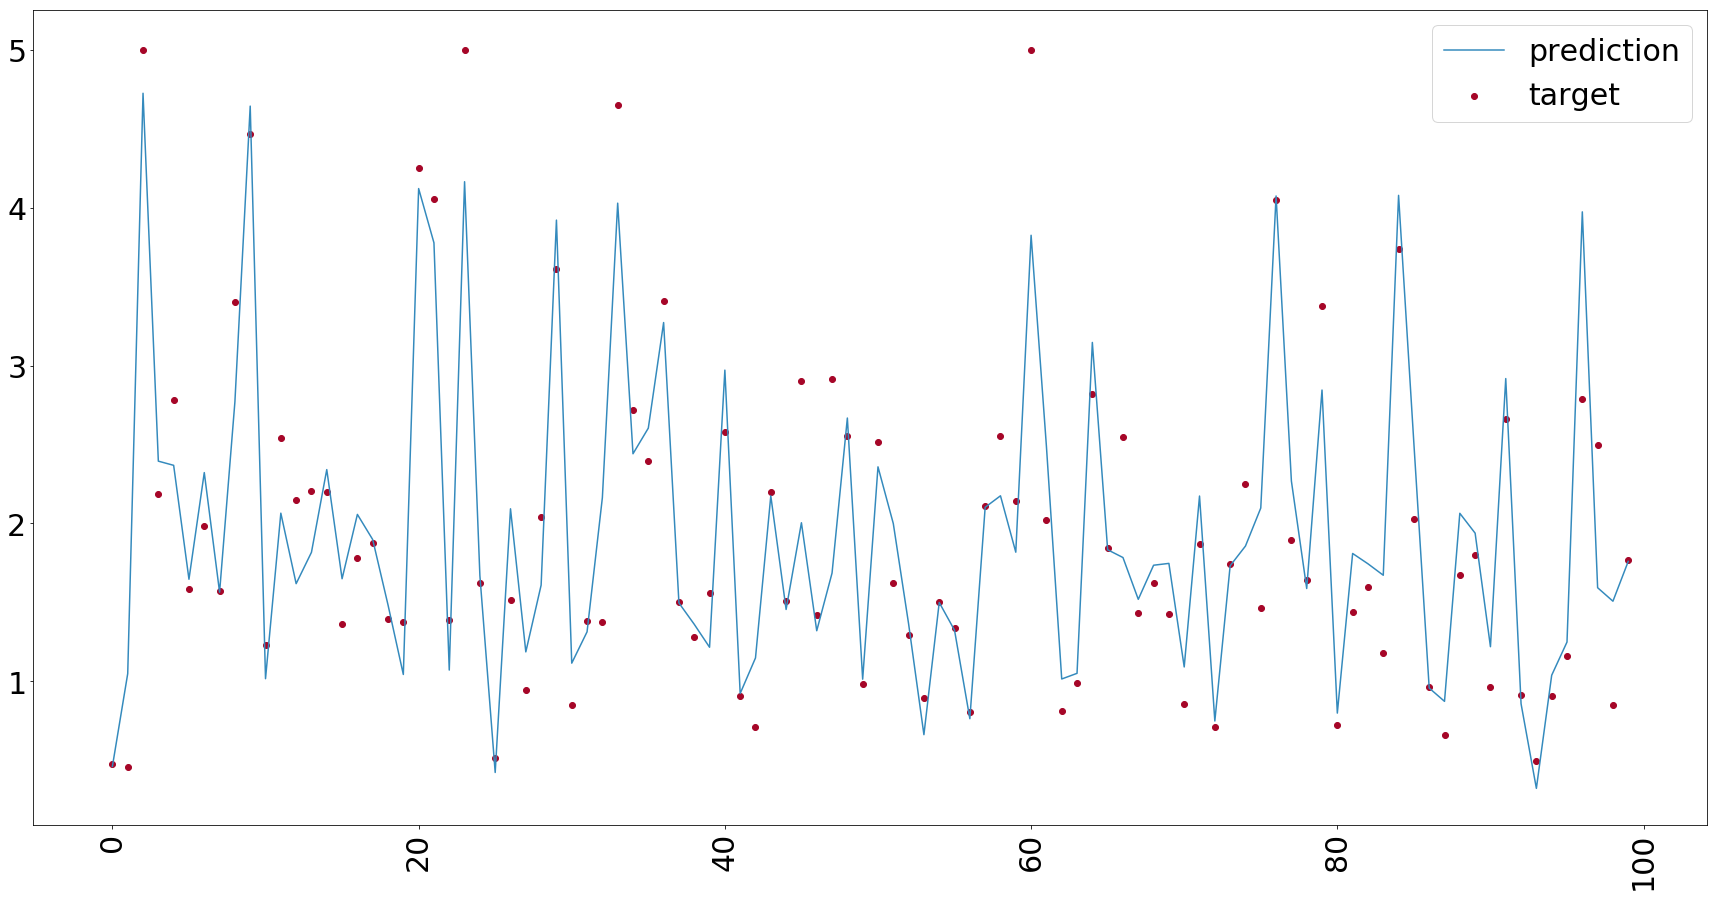

In [127]:
plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams['legend.fontsize'] =  30

size = 100

plt.plot(gb_predictions[:size], c='#348ABD',label='prediction')
plt.scatter(range(size),y_test[:size],c='#A60628',label='target')
plt.legend()
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.show()


In [115]:
test_score = [gb.loss_(y_test, y_pred) for y_pred in gb.staged_predict(X_test)]
print(len(test_score))
print(len(gb.train_score_))

3000
3000


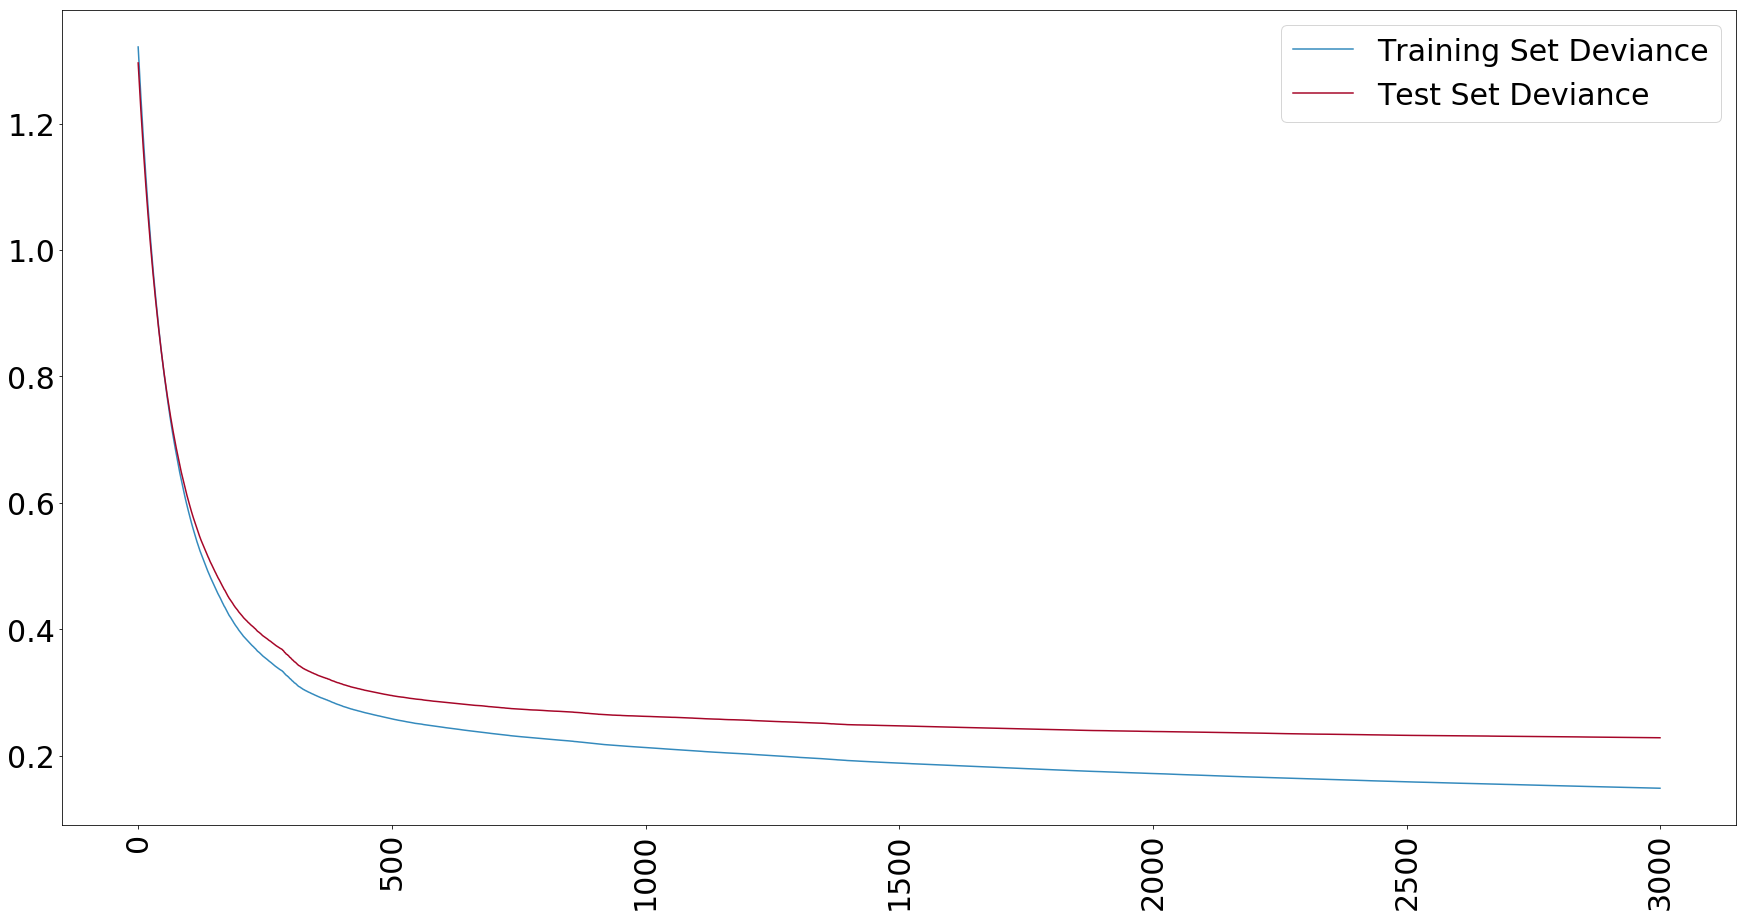

In [129]:
plt.plot(range(parameters['n_estimators']), gb.train_score_, c='#348ABD',
         label='Training Set Deviance')
plt.plot(range(parameters['n_estimators']), test_score, c='#A60628',
         label='Test Set Deviance')
plt.legend()
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.show()


In [118]:
feature_importance = gb.feature_importances_
feature_importance = 100*(feature_importance/feature_importance.max())
print(feature_importance)
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
more_important = [cal_h_features[i] for i in sorted_idx]    
print(more_important)

[100.           7.50072721   4.65237712   1.79209464   1.55145914
  22.60489852  18.47790464  20.15101673]
[4 3 2 1 6 7 5 0]
['Population', 'AveBedrms', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude', 'AveOccup', 'MedInc']


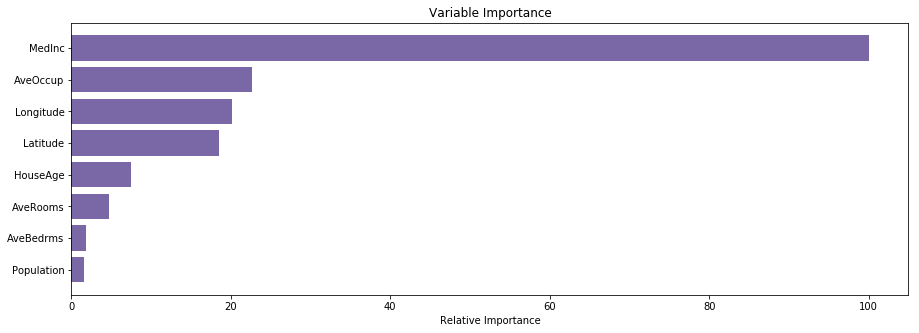

In [122]:
plt.rcParams['figure.figsize'] = [15,5]

plt.figure()
plt.barh(np.arange(len(feature_importance)), feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(np.arange(len(feature_importance)), more_important)
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()